# PS bunch generation: Pre-LIU parameters

In [1]:
# General imports
#%matplotlib notebook
import sys
import numpy as np
from math import log10, floor

import scipy.io as sio
from scipy.io import savemat
from scipy.constants import c
from scipy.optimize import curve_fit
from scipy.stats import moment, kurtosis

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

# BLonD imports
sys.path.append('./BLonD')
from blond.beam.beam import Proton, Beam
from blond.input_parameters.ring import Ring
from blond.input_parameters.rf_parameters import RFStation
from blond.trackers.tracker import RingAndRFTracker, FullRingAndRF
from blond.beam.distributions import matched_from_line_density

In [2]:
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
def gaussian(x, A, mu, sig):
    """gaussian_3_parameter(x, A, mu, sig)"""
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [4]:
def LorentzGamma(E_tot, E_rest=938.27208816E6):
    return (E_tot / E_rest)
    
def LorentzGamma_from_beta(beta):
    return (1./np.sqrt(1.-beta**2))    

def LorentzBeta(gamma):
    return np.sqrt( 1. - (1./gamma**2) )

def RelativisticMomentum(gamma, E_rest=938.27208816E6):
    return (gamma * E_rest * LorentzBeta(gamma))

def z_to_time(z, beta): 
    c = 299792458
    return z / (c * beta)
    
def E_from_gamma(gamma, E_rest=938.27208816E6):
    return (gamma*E_rest)

def dpp_from_dE(dE, E, beta):
    return (dE / (E * beta**2))
    
def dE_from_dpp(dpp, E, beta):
    return (dpp * E * beta**2)

In [5]:
# PS Pre-LIU 1.4 GeV Injection
LIU = False

if LIU:
    print('PS LIU 2 GeV Injection')
    Lorentz_Gamma = 3.1316
    
else:
    print( 'PS Pre-LIU 1.4 GeV Injection')
    Lorentz_Gamma = 2.4921
        
print ('----------------------')
print( 'Lorentz Gamma =\t', Lorentz_Gamma)
Lorentz_Beta = LorentzBeta(Lorentz_Gamma)
print ('Lorentz Beta =\t', round_sig(Lorentz_Beta))
Beam_Energy = E_from_gamma(Lorentz_Gamma)
print ('Energy =\t', round_sig(Beam_Energy/1E9), 'GeV')
Beam_Momentum = RelativisticMomentum(938.27208816E6, Lorentz_Gamma)
print ('Momentum =\t', round_sig(Beam_Momentum)/1E9, 'GeV/c')


PS Pre-LIU 1.4 GeV Injection
----------------------
Lorentz Gamma =	 2.4921
Lorentz Beta =	 0.916
Energy =	 2.34 GeV
Momentum =	 2.34 GeV/c


/home/HR/Documents/MD211/00_Longitudinal_Distn/Pre_LIU/blond_common/rf_functions/potential.py:451: RuntimeWarning: invalid value encountered in sqrt
  dEtraj = np.sqrt((potential_array[0]-potential_array) / eom_factor_dE)



	  dt - dE :  dt  limit set to  115.39000000000001

	  dt - dE :  dE  limit set to  3.762

	  dt - $\frac{\delta p}{p_0}$ :  dt  limit set to  115.39000000000001

	  dt - $\frac{\delta p}{p_0}$ :  $\frac{\delta p}{p_0}$  limit set to  1.9140000000000001


/home/HR/Documents/MD211/00_Longitudinal_Distn/Pre_LIU/blond_common/rf_functions/potential.py:451: RuntimeWarning: invalid value encountered in sqrt
  dEtraj = np.sqrt((potential_array[0]-potential_array) / eom_factor_dE)



	  dt - dE :  dt  limit set to  115.39000000000001

	  dt - dE :  dE  limit set to  4.675000000000001

	  dt - $\frac{\delta p}{p_0}$ :  dt  limit set to  115.39000000000001

	  dt - $\frac{\delta p}{p_0}$ :  $\frac{\delta p}{p_0}$  limit set to  2.387

	  dt - dE :  dt  limit set to  115.39000000000001

	  dt - dE :  dE  limit set to  5.929

	  dt - $\frac{\delta p}{p_0}$ :  dt  limit set to  115.39000000000001

	  dt - $\frac{\delta p}{p_0}$ :  $\frac{\delta p}{p_0}$  limit set to  3.0250000000000004

	  dt - dE :  dt  limit set to  115.39000000000001

	  dt - dE :  dE  limit set to  7.2490000000000006

	  dt - $\frac{\delta p}{p_0}$ :  dt  limit set to  115.39000000000001

	  dt - $\frac{\delta p}{p_0}$ :  $\frac{\delta p}{p_0}$  limit set to  3.696

	  dt - dE :  dt  limit set to  115.39000000000001

	  dt - dE :  dE  limit set to  8.261000000000001

	  dt - $\frac{\delta p}{p_0}$ :  dt  limit set to  115.39000000000001

	  dt - $\frac{\delta p}{p_0}$ :  $\frac{\delta p}{p_0}$  li

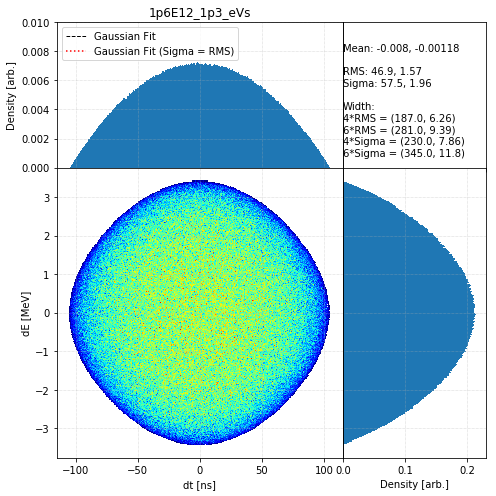

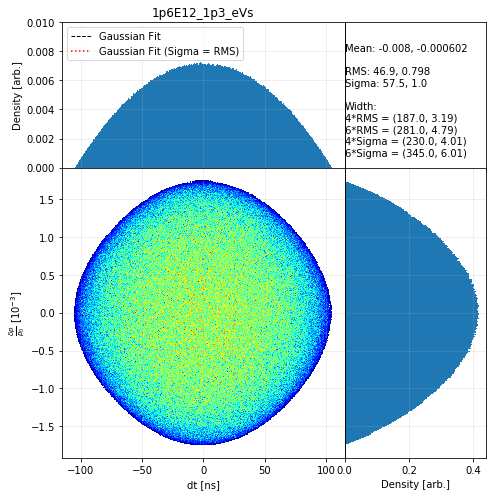

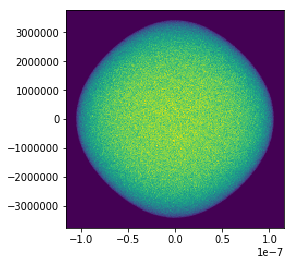

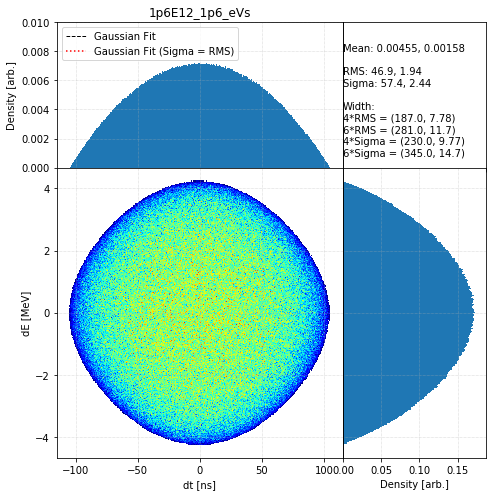

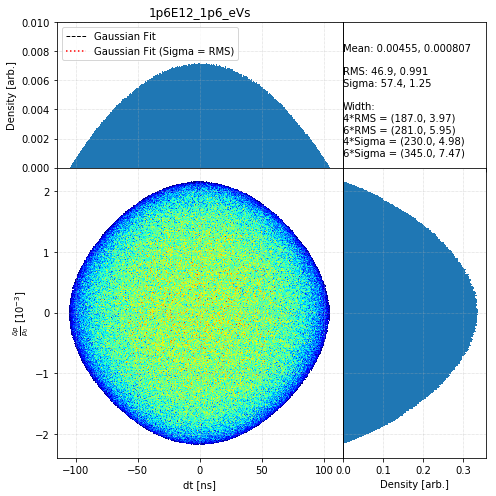

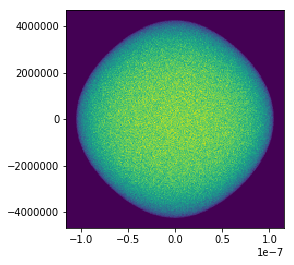

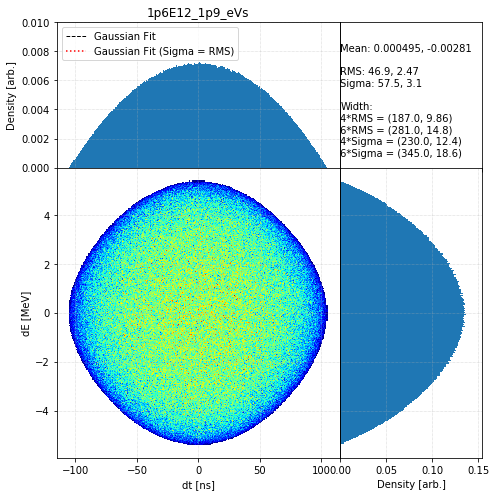

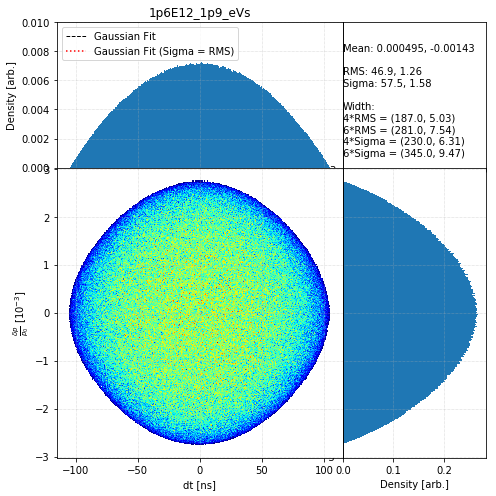

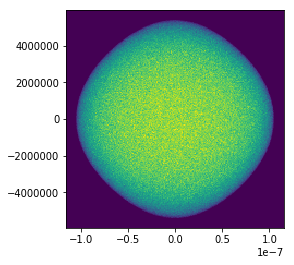

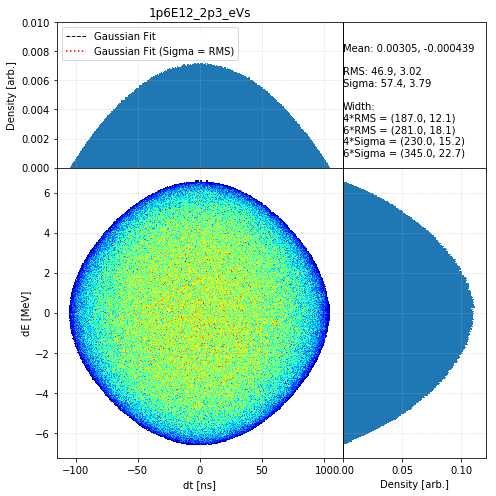

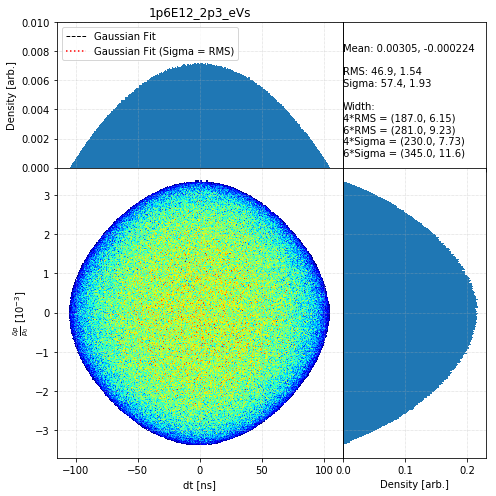

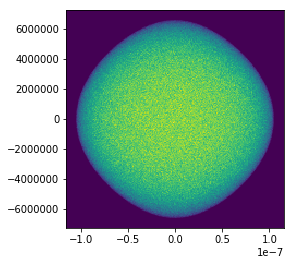

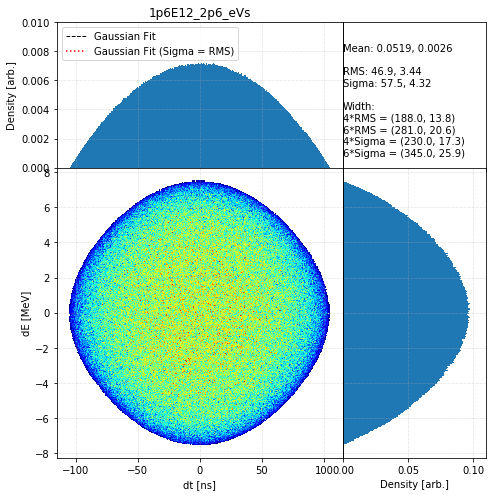

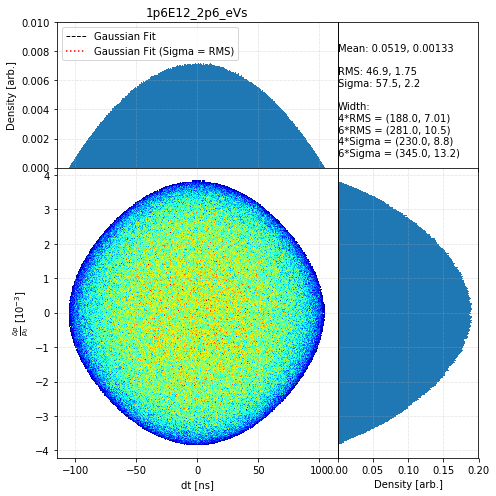

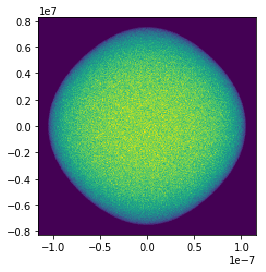

In [8]:
save_folder = 'Plots/'

# 2 Intensities
high_intensity = False
i = 0

emittances = [1.3, 1.6, 1.9, 2.3, 2.6]
str_emittances = ['1p3', '1p6', '1p9', '2p3','2p6']
voltages = [12.25E3, 18.9E3, 30.4E3, 45.5E3, 59.1E3]#original
#voltages = [12.3E3, 18.9E3, 30.4E3, 45.5E3, 59.1E3]

for i in range(len(voltages)):

    # Case selection
    n_macroparticles = 5E6

    # PS ring parameters
    circumference = 2*np.pi*100.
    bending_radius = 70.07887
    kinetic_energy = 1.4e9
    #gamma_t = 6.1
    #gamma_t = 6.08378627 #2 GeV
    gamma_t = 6.083785664 #1.4 GeV

    if high_intensity:
        bunch_intensity = 2.0E12
        str_intensity = '2E12'
    else:
        bunch_intensity = 1.6E12   
        str_intensity = '1p6E12'

    # PS bunch parameters Standard
    particle_type = Proton()
    full_bunch_length = 210e-9
    rf_harmonic = 7
    # full_emittance = 1.2
    line_density_type='parabolic_line'

    rf_voltage = voltages[i]

    beam_label = str_intensity + '_' +str_emittances[i] + '_eVs'

    # Constructing BLonD objects

    # Ring object
    ring = Ring(circumference, 1/gamma_t**2.,
                kinetic_energy, particle_type,
                synchronous_data_type='kinetic energy')

    # RF object
    rf_station = RFStation(ring, rf_harmonic,
                           rf_voltage, np.pi)

    # Beam object
    beam = Beam(ring, n_macroparticles, bunch_intensity)

    # Tracker objects
    total_induced = None

    longitudinal_tracker = RingAndRFTracker(rf_station, beam,
                                            TotalInducedVoltage=total_induced)

    full_tracker = FullRingAndRF([longitudinal_tracker])

    # Bunch generation
    output_profile = matched_from_line_density(
        beam, full_tracker,
        TotalInducedVoltage=total_induced,
        bunch_length=full_bunch_length,
        line_density_type=line_density_type)[1]

    # Using blond_common to verify separatrix and emittance

    from blond_common.rf_functions.potential import (
        rf_potential_generation, find_potential_wells_cubic,
        potential_well_cut_cubic, trajectory_area_cubic)

    n_points = 1000
    t_rev = ring.t_rev[0]
    eta_0 = ring.eta_0[0,0]
    tot_energy = ring.energy[0,0]
    beta_rel = ring.beta[0,0]
    charge = ring.Particle.charge
    energy_increment = ring.delta_E[0]
    voltage = rf_station.voltage[0,0]
    harmonic = rf_station.harmonic[0,0]
    phi_rf = rf_station.phi_rf[0,0]


    # Separatrix trajectory
    time_bounds_sep = [output_profile[0][0],
                       output_profile[0][-1]]

    time_array, rf_potential_array = rf_potential_generation(
        n_points, t_rev, voltage, harmonic, phi_rf, eta_0, charge, energy_increment,
        time_bounds=time_bounds_sep)

    potwell_max_locs = find_potential_wells_cubic(
        time_array, rf_potential_array)[0]

    time_array_list, potential_well_list = potential_well_cut_cubic(
        time_array, rf_potential_array, potwell_max_locs)

    (time_sep, dEsep, hamiltonian, calc_area_sep,
     half_energy_height, full_length_time) = trajectory_area_cubic(
        time_array_list[0], potential_well_list[0],
        eta_0, beta_rel, tot_energy)


    # Outter bunch trajectory
    time_bounds_bunch = [np.min(output_profile[0][output_profile[1]!=0.]),
                         np.max(output_profile[0][output_profile[1]!=0.])]

    time_array, rf_potential_array = rf_potential_generation(
        n_points, t_rev, voltage, harmonic, phi_rf, eta_0, charge, energy_increment,
        time_bounds=time_bounds_bunch)

    potwell_max_locs = find_potential_wells_cubic(
        time_array, rf_potential_array)[0]

    (time_bunch, dEbunch, hamiltonian, calc_area_bunch,
     half_energy_height, full_length_time) = trajectory_area_cubic(
        time_array, rf_potential_array,
        eta_0, beta_rel, tot_energy)

    # PLOTS

    savename = str(save_folder + beam_label +'_z_dE_hist.png' )
 
    master_bins = int(512)

    x_dat_lim = 1.
    y_dat_lim = 1.
    max_x_hist = 0.01
    max_y_hist = 0.01

    x_lab = 'dt'
    y_lab = 'dE'
    x_unit = 'ns'
    y_unit = 'MeV'

    y_dat = np.array(beam.dE)/1E6
    x_dat = np.array((beam.dt - rf_station.t_rf[0,0]/2.))*1E9

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)
    beam_label
    title = str( beam_label )    

    fig = plt.figure(figsize=(7,7))
    gs = gridspec.GridSpec(nrows=3,ncols=3,figure=fig,width_ratios= [1, 1, 1],height_ratios=[1, 1, 1],wspace=0.0,hspace=0.0)

    # Calculate RMS Qx and Qy
    #-------------------------------------------------------------------
    x_dat_rms = np.sqrt(moment(x_dat,2))
    y_dat_rms = np.sqrt(moment(y_dat,2))
    x_dat_min = np.min(x_dat)
    x_dat_max = np.max(x_dat)
    y_dat_min = np.min(y_dat)
    y_dat_max = np.max(y_dat) 
    x_dat_4sig = 4 * x_dat_rms
    y_dat_4sig = 4 * y_dat_rms
    x_dat_6sig = 6 * x_dat_rms
    y_dat_6sig = 6 * y_dat_rms

    x_fine = np.arange(x_dat_min, x_dat_max, 1E5)
    y_fine = np.arange(y_dat_min, y_dat_max, 1E5)

    # TEXT BOX (top right)
    #-------------------------------------------------------------------
    ax4 = fig.add_subplot(gs[0, 2:3])
    ax4.set_yticklabels([])
    ax4.set_xticklabels([])

    # FIRST SUBPLOT - x histogram
    #-------------------------------------------------------------------
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax1.set_title(title)    
    n_x, bins_x, patches_x = ax1.hist(x_dat, bins=int(master_bins/2), range=(np.min(x_dat), np.max(x_dat)), density=True)
    bins_x = bins_x[:-1] + (bins_x[1]-bins_x[0])/2 # centre bins

    x_dat_max = np.max(x_dat)
    x_dat_min = np.min(x_dat)       

    y_dat_max = np.max(y_dat)
    y_dat_min = np.min(y_dat)           

    if (-1*x_dat_min) > (x_dat_max):
        x_dat_lim = round(-1*x_dat_min, 2) * 1.1
    else:
        x_dat_lim = round(x_dat_max, 2) * 1.1     

    if (-1*y_dat_min) > (y_dat_max):
        y_dat_lim = round(-1*y_dat_min, 2) * 1.1
    else:
        y_dat_lim = round(y_dat_max, 2) * 1.1        
    print( '\n\t ',x_lab,'-',y_lab,': ',x_lab,' limit set to ', x_dat_lim)
    print( '\n\t ',x_lab,'-',y_lab,': ',y_lab,' limit set to ', y_dat_lim)

    if np.max(n_x) > max_x_hist :
        max_x_hist = round(np.max(n_x),2) * 1.1
        print( '\n\t ',x_lab,'-',y_lab,': max_x_hist set to ', max_x_hist)

    # fit Gaussian to histogram
    try:    
        amp_min_x = 0.99 * np.max(n_x)
        amp_max_x = 1.2 * np.max(n_x)
        if np.mean(x_dat) < 0:
            mean_min_x = 1.05 * np.mean(x_dat)
            mean_max_x = 0.95 * np.mean(x_dat)
        else:    
            mean_min_x = 0.95 * np.mean(x_dat)
            mean_max_x = 1.05 * np.mean(x_dat)                
        sig_min_x = 0.5 * x_dat_rms
        sig_max_x = 1.5 * x_dat_rms
        poptx, pcov = curve_fit(gaussian, bins_x, n_x, method = 'trf', bounds =((amp_min_x, mean_min_x, sig_min_x), (amp_max_x, mean_max_x, sig_max_x)))
        ax1.plot(x_fine, gaussian(x_fine, poptx[0], poptx[1], poptx[2]), 'k--', lw=1, label='Gaussian Fit')
        ax1.plot(x_fine, gaussian(x_fine, poptx[0], poptx[1], x_dat_rms), 'r:', lw=1.5, label='Gaussian Fit (Sigma = RMS)')
        ax1.legend(loc=2)
    except RuntimeError:
        print ('\n\t TUNE: RuntimeError ', beam_label, ' scan tune =', tune_tit, ' turn = ', turn, ' ', x_dat, ' Gaussian fit not found')

    # ~ ax1.set_ylabel('Frequency')
    ax1.set_ylabel('Density [arb.]')    
    ax1.grid(which='both', ls=':', lw=0.5)
    ax1.set_ylim(0, max_x_hist)
    ax1.set_xlim(-1*x_dat_lim, x_dat_lim)

    # SECOND SUBPLOT - y histogram
    #-------------------------------------------------------------------
    ax3 = fig.add_subplot(gs[1:3, 2])
    n_y, bins_y, patches_y = ax3.hist(y_dat, bins=int(master_bins/2), range=(np.min(y_dat), np.max(y_dat)), orientation=u'horizontal', density=True)
    bins_y = bins_y[:-1] + (bins_y[1]-bins_y[0])/2 # centre bins

    #if first_turn_again:
    #if np.max(n_y) > max_y_hist :
    max_y_hist = round(np.max(n_y),2) * 1.1
    #    print( '\n\t ',x_lab,'-',y_lab,': max_y_hist set to ', max_y_hist)
     #   first_turn_again = False

    # fit Gaussian to histogram
    try:
        amp_min_y = 0.99 * np.max(n_y)
        amp_max_y = 1.2 * np.max(n_y)
        if np.mean(y_dat) < 0:
            mean_min_y = 1.05 * np.mean(y_dat)
            mean_max_y = 0.95 * np.mean(y_dat)
        else:    
            mean_min_y = 0.95 * np.mean(y_dat)
            mean_max_y = 1.05 * np.mean(y_dat)  
        sig_min_y = 0.5 * y_dat_rms
        sig_max_y = 1.5 * y_dat_rms
        popty, pcovy = curve_fit(gaussian, bins_y, n_y, method = 'trf', bounds =((amp_min_y, mean_min_y, sig_min_y), (amp_max_y, mean_max_y, sig_max_y)))
        ax3.plot(gaussian(y_fine, popty[0], popty[1], popty[2]), y_fine, 'k--', lw=1, label='Gaussian Fit')
        ax3.plot(gaussian(y_fine, popty[0], popty[1], y_dat_rms), y_fine, 'r:', lw=1.5, label='Gaussian Fit (Sigma = RMS)')    
    except RuntimeError:
        print( '\n\t TUNE: RuntimeError ', beam_label,' Gaussian fit not found')

    ax3.set_xlabel('Density [arb.]')    
    ax3.set_xlim(0, max_y_hist)
    ax3.set_ylim(-1*y_dat_lim, y_dat_lim)
    ax3.grid(which='both', ls=':', lw=0.5)

    # MAIN PLOT: TUNE FOOTPRINT
    #-------------------------------------------------------------------
    ax2 = fig.add_subplot(gs[1:3, 0:2])
    ax2.hist2d(x_dat, y_dat, bins=master_bins, cmap=my_cmap, vmin=1, range=[[np.min(x_dat), np.max(x_dat)], [np.min(y_dat), np.max(y_dat)]]) 
    ax2.set_xlabel(str(x_lab+' ['+ x_unit +']'))
    ax2.set_ylabel(str(y_lab+' ['+ y_unit +']'))
    ax2.set_xlim(-1*x_dat_lim, x_dat_lim)
    ax2.set_ylim(-1*y_dat_lim, y_dat_lim)
    ax2.grid(which='both', ls=':', lw=0.5)

    ax4txt = str(
        'Mean: ' + str(round_sig(np.mean(x_dat),3)) + ', ' + str(round_sig(np.mean(y_dat),3)) + '\n' + '\n' +
        'RMS: ' + str(round_sig(x_dat_rms,3)) + ', ' + str(round_sig(y_dat_rms,3)) + '\n' +
        'Sigma: ' + str(round_sig(poptx[2],3)) + ', ' + str(round_sig(popty[2],3)) + '\n' + '\n' +
        'Width:\n' +
        '4*RMS = (' + str(round_sig(x_dat_4sig,3)) + ', ' + str(round_sig(y_dat_4sig,3)) + ')\n' +
        '6*RMS = (' + str(round_sig(x_dat_6sig,3)) + ', ' + str(round_sig(y_dat_6sig,3)) + ')\n' +
        '4*Sigma = (' + str(round_sig(4*poptx[2],3)) + ', ' + str(round_sig(4*popty[2],3)) + ')\n' +
        '6*Sigma = (' + str(round_sig(6*poptx[2],3)) + ', ' + str(round_sig(6*popty[2],3)) + ')\n' 
        )
    ax4.text(0.001, 0.001, ax4txt, fontsize=10)

    plt.tight_layout()
    fig.savefig(savename)
    
    
    savename = str(save_folder + beam_label +'_dt_dpp_hist.png' )
 
    master_bins = int(512)

    x_dat_lim = 1.
    y_dat_lim = 1.
    max_x_hist = 0.01
    max_y_hist = 0.01

    x_lab = 'dt'
    y_lab = r'$\frac{\delta p}{p_0}$'
    x_unit = 'ns'
    y_unit = r'$10^{-3}$'

    y_dat = dpp_from_dE(np.array(beam.dE), Beam_Energy, Lorentz_Beta)*1E3
    x_dat = np.array((beam.dt - rf_station.t_rf[0,0]/2.))*1E9

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)
    beam_label
    title = str( beam_label )    

    fig = plt.figure(figsize=(7,7))
    gs = gridspec.GridSpec(nrows=3,ncols=3,figure=fig,width_ratios= [1, 1, 1],height_ratios=[1, 1, 1],wspace=0.0,hspace=0.0)

    # Calculate RMS Qx and Qy
    #-------------------------------------------------------------------
    x_dat_rms = np.sqrt(moment(x_dat,2))
    y_dat_rms = np.sqrt(moment(y_dat,2))
    x_dat_min = np.min(x_dat)
    x_dat_max = np.max(x_dat)
    y_dat_min = np.min(y_dat)
    y_dat_max = np.max(y_dat) 
    x_dat_4sig = 4 * x_dat_rms
    y_dat_4sig = 4 * y_dat_rms
    x_dat_6sig = 6 * x_dat_rms
    y_dat_6sig = 6 * y_dat_rms

    x_fine = np.arange(x_dat_min, x_dat_max, 1E5)
    y_fine = np.arange(y_dat_min, y_dat_max, 1E5)

    # TEXT BOX (top right)
    #-------------------------------------------------------------------
    ax4 = fig.add_subplot(gs[0, 2:3])
    ax4.set_yticklabels([])
    ax4.set_xticklabels([])

    # FIRST SUBPLOT - x histogram
    #-------------------------------------------------------------------
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax1.set_title(title)    
    n_x, bins_x, patches_x = ax1.hist(x_dat, bins=int(master_bins/2), range=(np.min(x_dat), np.max(x_dat)), density=True)
    bins_x = bins_x[:-1] + (bins_x[1]-bins_x[0])/2 # centre bins

    x_dat_max = np.max(x_dat)
    x_dat_min = np.min(x_dat)       

    y_dat_max = np.max(y_dat)
    y_dat_min = np.min(y_dat)           

    if (-1*x_dat_min) > (x_dat_max):
        x_dat_lim = round(-1*x_dat_min, 2) * 1.1
    else:
        x_dat_lim = round(x_dat_max, 2) * 1.1     

    if (-1*y_dat_min) > (y_dat_max):
        y_dat_lim = round(-1*y_dat_min, 2) * 1.1
    else:
        y_dat_lim = round(y_dat_max, 2) * 1.1        
    print( '\n\t ',x_lab,'-',y_lab,': ',x_lab,' limit set to ', x_dat_lim)
    print( '\n\t ',x_lab,'-',y_lab,': ',y_lab,' limit set to ', y_dat_lim)

    if np.max(n_x) > max_x_hist :
        max_x_hist = round(np.max(n_x),2) * 1.1
        print( '\n\t ',x_lab,'-',y_lab,': max_x_hist set to ', max_x_hist)

    # fit Gaussian to histogram
    try:    
        amp_min_x = 0.99 * np.max(n_x)
        amp_max_x = 1.2 * np.max(n_x)
        if np.mean(x_dat) < 0:
            mean_min_x = 1.05 * np.mean(x_dat)
            mean_max_x = 0.95 * np.mean(x_dat)
        else:    
            mean_min_x = 0.95 * np.mean(x_dat)
            mean_max_x = 1.05 * np.mean(x_dat)                
        sig_min_x = 0.5 * x_dat_rms
        sig_max_x = 1.5 * x_dat_rms
        poptx, pcov = curve_fit(gaussian, bins_x, n_x, method = 'trf', bounds =((amp_min_x, mean_min_x, sig_min_x), (amp_max_x, mean_max_x, sig_max_x)))
        ax1.plot(x_fine, gaussian(x_fine, poptx[0], poptx[1], poptx[2]), 'k--', lw=1, label='Gaussian Fit')
        ax1.plot(x_fine, gaussian(x_fine, poptx[0], poptx[1], x_dat_rms), 'r:', lw=1.5, label='Gaussian Fit (Sigma = RMS)')
        ax1.legend(loc=2)
    except RuntimeError:
        print ('\n\t TUNE: RuntimeError ', beam_label, ' scan tune =', tune_tit, ' turn = ', turn, ' ', x_dat, ' Gaussian fit not found')

    # ~ ax1.set_ylabel('Frequency')
    ax1.set_ylabel('Density [arb.]')    
    ax1.grid(which='both', ls=':', lw=0.5)
    ax1.set_ylim(0, max_x_hist)
    ax1.set_xlim(-1*x_dat_lim, x_dat_lim)

    # SECOND SUBPLOT - y histogram
    #-------------------------------------------------------------------
    ax3 = fig.add_subplot(gs[1:3, 2])
    n_y, bins_y, patches_y = ax3.hist(y_dat, bins=int(master_bins/2), range=(np.min(y_dat), np.max(y_dat)), orientation=u'horizontal', density=True)
    bins_y = bins_y[:-1] + (bins_y[1]-bins_y[0])/2 # centre bins

    #if first_turn_again:
    #if np.max(n_y) > max_y_hist :
    max_y_hist = round(np.max(n_y),2) * 1.05
    #    print( '\n\t ',x_lab,'-',y_lab,': max_y_hist set to ', max_y_hist)
     #   first_turn_again = False

    # fit Gaussian to histogram
    try:
        amp_min_y = 0.99 * np.max(n_y)
        amp_max_y = 1.2 * np.max(n_y)
        if np.mean(y_dat) < 0:
            mean_min_y = 1.05 * np.mean(y_dat)
            mean_max_y = 0.95 * np.mean(y_dat)
        else:    
            mean_min_y = 0.95 * np.mean(y_dat)
            mean_max_y = 1.05 * np.mean(y_dat)  
        sig_min_y = 0.5 * y_dat_rms
        sig_max_y = 1.5 * y_dat_rms
        popty, pcovy = curve_fit(gaussian, bins_y, n_y, method = 'trf', bounds =((amp_min_y, mean_min_y, sig_min_y), (amp_max_y, mean_max_y, sig_max_y)))
        ax3.plot(gaussian(y_fine, popty[0], popty[1], popty[2]), y_fine, 'k--', lw=1, label='Gaussian Fit')
        ax3.plot(gaussian(y_fine, popty[0], popty[1], y_dat_rms), y_fine, 'r:', lw=1.5, label='Gaussian Fit (Sigma = RMS)')    
    except RuntimeError:
        print( '\n\t TUNE: RuntimeError ', beam_label,' Gaussian fit not found')

    ax3.set_xlabel('Density [arb.]')    
    ax3.set_xlim(0, max_y_hist)
    ax3.set_ylim(-1*y_dat_lim, y_dat_lim)
    ax3.grid(which='both', ls=':', lw=0.5)

    # MAIN PLOT: TUNE FOOTPRINT
    #-------------------------------------------------------------------
    ax2 = fig.add_subplot(gs[1:3, 0:2])
    ax2.hist2d(x_dat, y_dat, bins=master_bins, cmap=my_cmap, vmin=1, range=[[np.min(x_dat), np.max(x_dat)], [np.min(y_dat), np.max(y_dat)]]) 
    ax2.set_xlabel(str(x_lab+' ['+ x_unit +']'))
    ax2.set_ylabel(str(y_lab+' ['+ y_unit +']'))
    ax2.set_xlim(-1*x_dat_lim, x_dat_lim)
    ax2.set_ylim(-1*y_dat_lim, y_dat_lim)
    ax2.grid(which='both', ls=':', lw=0.5)

    ax4txt = str(
        'Mean: ' + str(round_sig(np.mean(x_dat),3)) + ', ' + str(round_sig(np.mean(y_dat),3)) + '\n' + '\n' +
        'RMS: ' + str(round_sig(x_dat_rms,3)) + ', ' + str(round_sig(y_dat_rms,3)) + '\n' +
        'Sigma: ' + str(round_sig(poptx[2],3)) + ', ' + str(round_sig(popty[2],3)) + '\n' + '\n' +
        'Width:\n' +
        '4*RMS = (' + str(round_sig(x_dat_4sig,3)) + ', ' + str(round_sig(y_dat_4sig,3)) + ')\n' +
        '6*RMS = (' + str(round_sig(x_dat_6sig,3)) + ', ' + str(round_sig(y_dat_6sig,3)) + ')\n' +
        '4*Sigma = (' + str(round_sig(4*poptx[2],3)) + ', ' + str(round_sig(4*popty[2],3)) + ')\n' +
        '6*Sigma = (' + str(round_sig(6*poptx[2],3)) + ', ' + str(round_sig(6*popty[2],3)) + ')\n' 
        )
    ax4.text(0.001, 0.001, ax4txt, fontsize=10)

    plt.tight_layout()
    fig.savefig(savename)
    
    # First we need to make the data into a 2D array

    # Start with our data
    dE = np.array(beam.dE)
    dt = np.array((beam.dt - rf_station.t_rf[0,0]/2.))

    bin_size_x = 200
    bin_size_y = 200
    x_min = np.min(dt)*1.1
    x_max = np.max(dt)*1.1
    y_min = np.min(dE)*1.1
    y_max = np.max(dE)*1.1

    # Need a heatmap to make a 2D array:
    # Create heatmap
    fig1 = plt.figure(facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)

    heatmap, xedges, yedges = np.histogram2d(dt, dE, bins=(bin_size_x, bin_size_y), range=[[x_min, x_max],[y_min, y_max]])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax1.imshow(heatmap, extent=extent, aspect=( (x_min - x_max)/(y_min - y_max) ) )
    
    # We want this in units of MeV and ns
    data_dict = {'time_nsec': xedges*1E9, 'energy_MeV': yedges*1E-6, 'density_array': heatmap}
    fname = str('PyORBIT_Tomo_file_' + beam_label + '.mat')
    savemat(fname, data_dict)